# Importing the libraries

In [1]:
import bs4 as bs
import numpy as np
import urllib.request
import re
import pandas as pd
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to C:\Users\Ashish
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading National day speech data

In [2]:
text = "India is a land of festivals. It celebrates numerous religious festivals and three national festivals. Gandhi Jayanti (2nd October), Republic Day (26th January) and Independence Day (15th August) are the three national festivals celebrated in the country. The government of India has declared a national holiday on the national festivals of the country. All the schools, colleges, offices and markets across the country are closed on these festivals. The national holidays are celebrated throughout the nation with a nationalistic and patriotic zeal. They are some of the rare festivals, which the citizens of India celebrate together beyond their divisions of caste and religion. Hindu, Muslims, Christians, rich and poor; educated and illiterate, all commemorate their freedom fighters and national heroes and reaffirm their faith in their vision and philosophy. LONG AND SHORT ESSAY ON NATIONAL FESTIVALS OF INDIA IN ENGLISH Here we are providing short and long essays on National Festivals of India of varying lengths to help you with the topic in your exams/school assignments. These National Festivals of India Essays have been written in simple English to let you better understand the national festivals of India and their significance. You can select any National Festivals of India essay according to your need and requirement and present them during your school/college essay writing, speech or debate competitions. SHORT ESSAY ON NATIONAL FESTIVALS OF INDIA – ESSAY 1 (200 WORDS) . India celebrates three national festivals – Republic Day, Independence Day and Gandhi Jayanti. National festivals in India are celebrated with as much pomp and show as the religious festivals of different states. The citizens of our country are seen immersed in the feeling of patriotism on all three festivals. Various big and small events to celebrate these festivals are organized at different places throughout the country. Schools, colleges, offices and markets are decked up with flowers, balloons, flags and tri-colour drapes to add to the festive mood. Skits, poetry recitation, debates, fancy dress competitions and various cultural programs are organized as a part of these celebrations. The celebrations at schools, offices and other institutes are mostly held a day before these festivals as the same are closed on the festival day. Various housing societies also organize get together to celebrate these festivals. They usually celebrate these during the morning hours. Cultural activities are organized, patriotic songs are played and brunch or lunch is usually arranged for the people. These festivals are celebrated to honour our great leaders and get inspired by their deeds. The events organized to celebrate these festivals also offer a good platform to bond with our neighbours, colleagues and other near and dear ones."

In [3]:
# Viewing the content of text
text

'India is a land of festivals. It celebrates numerous religious festivals and three national festivals. Gandhi Jayanti (2nd October), Republic Day (26th January) and Independence Day (15th August) are the three national festivals celebrated in the country. The government of India has declared a national holiday on the national festivals of the country. All the schools, colleges, offices and markets across the country are closed on these festivals. The national holidays are celebrated throughout the nation with a nationalistic and patriotic zeal. They are some of the rare festivals, which the citizens of India celebrate together beyond their divisions of caste and religion. Hindu, Muslims, Christians, rich and poor; educated and illiterate, all commemorate their freedom fighters and national heroes and reaffirm their faith in their vision and philosophy. LONG AND SHORT ESSAY ON NATIONAL FESTIVALS OF INDIA IN ENGLISH Here we are providing short and long essays on National Festivals of In

In [4]:
# Tokenize sentences
words = nltk.word_tokenize(text)

In [5]:
# Viewing the tokenized words
words

['India',
 'is',
 'a',
 'land',
 'of',
 'festivals',
 '.',
 'It',
 'celebrates',
 'numerous',
 'religious',
 'festivals',
 'and',
 'three',
 'national',
 'festivals',
 '.',
 'Gandhi',
 'Jayanti',
 '(',
 '2nd',
 'October',
 ')',
 ',',
 'Republic',
 'Day',
 '(',
 '26th',
 'January',
 ')',
 'and',
 'Independence',
 'Day',
 '(',
 '15th',
 'August',
 ')',
 'are',
 'the',
 'three',
 'national',
 'festivals',
 'celebrated',
 'in',
 'the',
 'country',
 '.',
 'The',
 'government',
 'of',
 'India',
 'has',
 'declared',
 'a',
 'national',
 'holiday',
 'on',
 'the',
 'national',
 'festivals',
 'of',
 'the',
 'country',
 '.',
 'All',
 'the',
 'schools',
 ',',
 'colleges',
 ',',
 'offices',
 'and',
 'markets',
 'across',
 'the',
 'country',
 'are',
 'closed',
 'on',
 'these',
 'festivals',
 '.',
 'The',
 'national',
 'holidays',
 'are',
 'celebrated',
 'throughout',
 'the',
 'nation',
 'with',
 'a',
 'nationalistic',
 'and',
 'patriotic',
 'zeal',
 '.',
 'They',
 'are',
 'some',
 'of',
 'the',
 'rar

In [6]:
# Removing Stopwords
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append(text)

aqw = [W for W in words if not W in stop_words]
qwe = []
for W in words:
    if W not in stop_words:
        qwe.append(W) 
    
print(qwe)

['India', 'land', 'festivals', '.', 'It', 'celebrates', 'numerous', 'religious', 'festivals', 'three', 'national', 'festivals', '.', 'Gandhi', 'Jayanti', '(', '2nd', 'October', ')', ',', 'Republic', 'Day', '(', '26th', 'January', ')', 'Independence', 'Day', '(', '15th', 'August', ')', 'three', 'national', 'festivals', 'celebrated', 'country', '.', 'The', 'government', 'India', 'declared', 'national', 'holiday', 'national', 'festivals', 'country', '.', 'All', 'schools', ',', 'colleges', ',', 'offices', 'markets', 'across', 'country', 'closed', 'festivals', '.', 'The', 'national', 'holidays', 'celebrated', 'throughout', 'nation', 'nationalistic', 'patriotic', 'zeal', '.', 'They', 'rare', 'festivals', ',', 'citizens', 'India', 'celebrate', 'together', 'beyond', 'divisions', 'caste', 'religion', '.', 'Hindu', ',', 'Muslims', ',', 'Christians', ',', 'rich', 'poor', ';', 'educated', 'illiterate', ',', 'commemorate', 'freedom', 'fighters', 'national', 'heroes', 'reaffirm', 'faith', 'vision', 

<FreqDist with 188 samples and 333 outcomes>
[('.', 24), (',', 20), ('festivals', 17), ('India', 9), ('national', 8), ('The', 5), ('celebrate', 5), ('country', 5), ('National', 4), (')', 4), ('three', 4), ('Day', 4), ('(', 4), ('organized', 4), ('celebrated', 4), ('ESSAY', 3), ('offices', 3), ('Festivals', 3), ('day', 2), ('celebrates', 2), ('essay', 2), ('SHORT', 2), ('Republic', 2), ('Independence', 2), ('FESTIVALS', 2)]


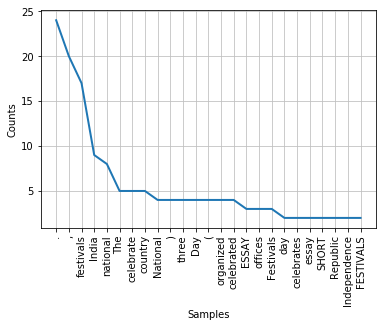

In [7]:
# Plotting the frequency distribution
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(qwe)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

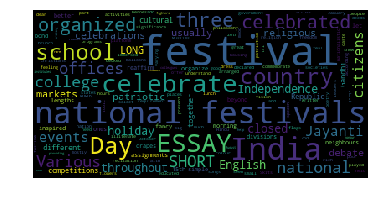

In [8]:
# Building the wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

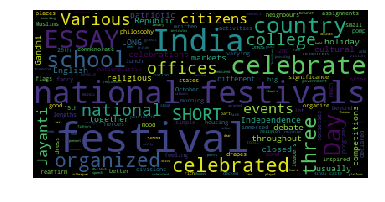

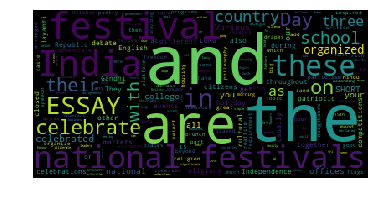

In [9]:
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud = WordCloud().generate(text)
plot_wordcloud(wordcloud)
wordcloud = WordCloud(stopwords={'to','of'}).generate(text)
plot_wordcloud(wordcloud)

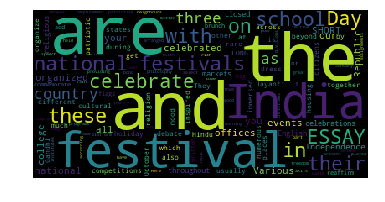

In [10]:
# Building the wordcloud with relative scaling = 0
wordcloud = WordCloud(relative_scaling = 0, stopwords = {'to','of'}).generate(text)
plot_wordcloud(wordcloud)

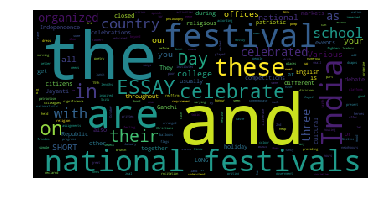

In [11]:
# Building the wordcloud with relative scaling = 1
wordcloud = WordCloud(relative_scaling = 1.0, stopwords = {'to','of'}).generate(text)
plot_wordcloud(wordcloud)

# Again Repeating same objective by scrapping the data from webpage

# Loading Narendra Modi Wikipedia page data

In [12]:
df = urllib.request.urlopen("https://en.wikipedia.org/wiki/Narendra_Modi")

# Extracting html data to text data

In [13]:
soup = bs.BeautifulSoup(df,'lxml')
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [14]:
text

'\n\nEarly political career\nPremiership\nNarendra Damodardas Modi (Gujarati pronunciation:\xa0[ˈnəɾendrə dɑmodəɾˈdɑs ˈmodiː]; born 17 September 1950) is an Indian politician serving as the 14th and current Prime Minister of India since 2014. He was the Chief Minister of Gujarat from 2001 to 2014, and is the Member of Parliament for Varanasi. Modi is a member of the Bharatiya Janata Party (BJP), and of the Rashtriya Swayamsevak Sangh (RSS), a Hindu nationalist volunteer organisation. He is the first prime minister outside of the Indian National Congress to win two consecutive terms with a full majority, and the second one to complete five years in office after Atal Bihari Vajpayee.[2]\nBorn to a Gujarati family in Vadnagar, Modi helped his father sell tea as a child, and has said he later ran his own stall. He was introduced to the RSS at the age of eight, beginning a long association with the organisation. Modi left home after finishing high-school in part due to an arranged marriage 

In [15]:
# Clearing the text data
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
clean_text = text.lower()
clean_text = re.sub(r"i'm", "i am", clean_text)
clean_text = re.sub(r"'s", "is", clean_text)
clean_text = re.sub(r"government's", "government is", clean_text)
clean_text = re.sub(r"he's", "he is", clean_text)
clean_text = re.sub(r"she's", "she is", clean_text)
clean_text = re.sub(r"that's", "that is", clean_text)
clean_text = re.sub(r"what's", "what is", clean_text)
clean_text = re.sub(r"where's", "where is", clean_text)
clean_text = re.sub(r"how's", "how is", clean_text)
clean_text = re.sub(r"\'ll", " will", clean_text)
clean_text = re.sub(r"\'ve", " have", clean_text)
clean_text = re.sub(r"\'re", " are", clean_text)
clean_text = re.sub(r"\'d", " would", clean_text)
clean_text = re.sub(r"n't", " not", clean_text)
clean_text = re.sub(r"won't", "will not", clean_text)
clean_text = re.sub(r"can't", "cannot", clean_text)
clean_text = re.sub(r"[%-()\"#/@;:<>{}`+=~|.!?,]", "", clean_text)

In [16]:
clean_text

' early political career premiership narendra damodardas modi gujarati pronunciation [ˈnəɾendrə dɑmodəɾˈdɑs ˈmodiː] born 17 september 1950 is an indian politician serving as the 14th and current prime minister of india since 2014 he was the chief minister of gujarat from 2001 to 2014 and is the member of parliament for varanasi modi is a member of the bharatiya janata party bjp and of the rashtriya swayamsevak sangh rss a hindu nationalist volunteer organisation he is the first prime minister outside of the indian national congress to win two consecutive terms with a full majority and the second one to complete five years in office after atal bihari vajpayee born to a gujarati family in vadnagar modi helped his father sell tea as a child and has said he later ran his own stall he was introduced to the rss at the age of eight beginning a long association with the organisation modi left home after finishing high-school in part due to an arranged marriage to jashodaben chimanlal which he 

In [17]:
# Tokenize sentences
words = nltk.word_tokenize(clean_text)

In [18]:
clean_text

' early political career premiership narendra damodardas modi gujarati pronunciation [ˈnəɾendrə dɑmodəɾˈdɑs ˈmodiː] born 17 september 1950 is an indian politician serving as the 14th and current prime minister of india since 2014 he was the chief minister of gujarat from 2001 to 2014 and is the member of parliament for varanasi modi is a member of the bharatiya janata party bjp and of the rashtriya swayamsevak sangh rss a hindu nationalist volunteer organisation he is the first prime minister outside of the indian national congress to win two consecutive terms with a full majority and the second one to complete five years in office after atal bihari vajpayee born to a gujarati family in vadnagar modi helped his father sell tea as a child and has said he later ran his own stall he was introduced to the rss at the age of eight beginning a long association with the organisation modi left home after finishing high-school in part due to an arranged marriage to jashodaben chimanlal which he 

In [19]:
# Removing Stopwords
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append(clean_text)

aqw = [W for W in words if not W in stop_words]

In [20]:
qwe = []
for W in words:
    if W not in stop_words:
        qwe.append(W) 
    
print(qwe)

['early', 'political', 'career', 'premiership', 'narendra', 'damodardas', 'modi', 'gujarati', 'pronunciation', '[', 'ˈnəɾendrə', 'dɑmodəɾˈdɑs', 'ˈmodiː', ']', 'born', '17', 'september', '1950', 'indian', 'politician', 'serving', '14th', 'current', 'prime', 'minister', 'india', 'since', '2014', 'chief', 'minister', 'gujarat', '2001', '2014', 'member', 'parliament', 'varanasi', 'modi', 'member', 'bharatiya', 'janata', 'party', 'bjp', 'rashtriya', 'swayamsevak', 'sangh', 'rss', 'hindu', 'nationalist', 'volunteer', 'organisation', 'first', 'prime', 'minister', 'outside', 'indian', 'national', 'congress', 'win', 'two', 'consecutive', 'terms', 'full', 'majority', 'second', 'one', 'complete', 'five', 'years', 'office', 'atal', 'bihari', 'vajpayee', 'born', 'gujarati', 'family', 'vadnagar', 'modi', 'helped', 'father', 'sell', 'tea', 'child', 'said', 'later', 'ran', 'stall', 'introduced', 'rss', 'age', 'eight', 'beginning', 'long', 'association', 'organisation', 'modi', 'left', 'home', 'finishi

<FreqDist with 2225 samples and 5245 outcomes>
[('modi', 167), ('government', 72), ('gujarat', 58), ('modiis', 48), ('bjp', 48), ('minister', 41), ('state', 34), ('indian', 33), ('india', 30), ('election', 29), ('rss', 27), ('campaign', 24), ('2014', 24), ('prime', 23), ('first', 22), ('also', 21), ('national', 19), ('chief', 18), ('hindu', 18), ('health', 18), ('2002', 18), ('year', 17), ('economic', 17), ('people', 16), ('years', 15)]


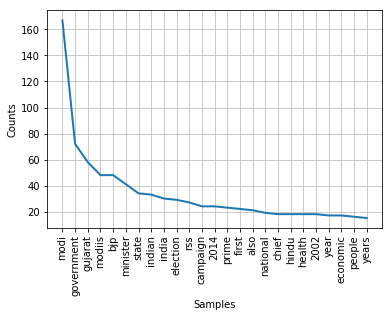

In [21]:
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(qwe)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [22]:
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

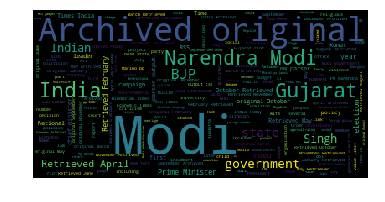

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words, relative_scaling=1.0).generate(soup.get_text())
plot_wordcloud(wordcloud)

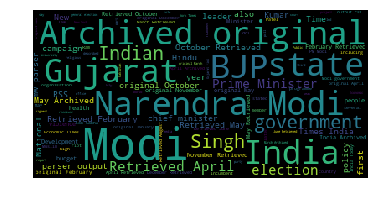

In [24]:
wordcloud = WordCloud(stopwords=stop_words, relative_scaling=0.0).generate(soup.get_text())
plot_wordcloud(wordcloud)